In [1]:
# Problem Statement

# A Dream House Finance Company Wants to Automate the Loan Process Based on their Application
# the presence for this company customers across from the globe
# Urban, Semi-Urbal, Rural

# Variables Include
# Applicant Income
# Co-Applicant Income
# Gender
# Marital-Status
# Credit History
# Loan Amount
# Loan Amount Term 
# Education
# Self Employed etc.


# We have Predict the Loan_Status (Yes/No) so that the company can target these customers

In [2]:
# importing necessary Librarires


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import io
%cd "C:\Users\Sanja\OneDrive\Desktop\Loan Prediction"

C:\Users\Sanja\OneDrive\Desktop\Loan Prediction


In [4]:
# Data 

train  = pd.read_csv("train_ctrUa4K.csv")
test   = pd.read_csv("test_lAUu6dG.csv")

In [5]:
# Understanding the data

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# info to understand the each variable type as well as size of the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
# Add Temporarily Loan_Status to the test data for concatenation

test['Loan_Status']='test'

In [10]:
# Concat both the dataframes for preprocessing

combined_df=pd.concat([train,test],axis=0)  #axis=0 Row wise concatenation

In [11]:
combined_df.Credit_History=combined_df.Credit_History.astype("object")

###     Data Cleaning

#####   Missing Values Imputation

In [12]:
combined_df.isnull().sum().sort_values(ascending=False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Describe is the function for Descriptive Statistics

combined_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,142.511530,342.201873
std,5695.104533,2718.772806,77.421743,65.100602
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,100.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,162.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [14]:
# Numeric Variables Missing Values

combined_df.Loan_Amount_Term.value_counts(dropna=False)

360.0    823
180.0     66
480.0     23
NaN       20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [15]:
combined_df.LoanAmount=combined_df.LoanAmount.fillna(combined_df.LoanAmount.median())

In [16]:
combined_df.Loan_Amount_Term=combined_df.Loan_Amount_Term.fillna(combined_df.Loan_Amount_Term.median())

In [17]:
# Object Data Missing Values

combined_df.Married.value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [18]:
combined_df.Credit_History=combined_df.Credit_History.fillna(1.0)

In [19]:
combined_df.Self_Employed=combined_df.Self_Employed.fillna("No")

In [20]:
combined_df.Dependents=combined_df.Dependents.fillna("0")

In [21]:
combined_df.Gender=combined_df.Gender.fillna("Male")

In [22]:
combined_df.Married=combined_df.Married.fillna("Yes")

In [23]:
#  split back to train and test for EDA

train_df=combined_df[combined_df.Loan_Status!='test']
test_df=combined_df[combined_df.Loan_Status=='test']

In [24]:
test_df=test_df.drop("Loan_Status",axis=1)

In [25]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


### Exploratory Data Analysis

SKEWNESS : 6.539513113994625
KURTOSIS : 60.54067593369113


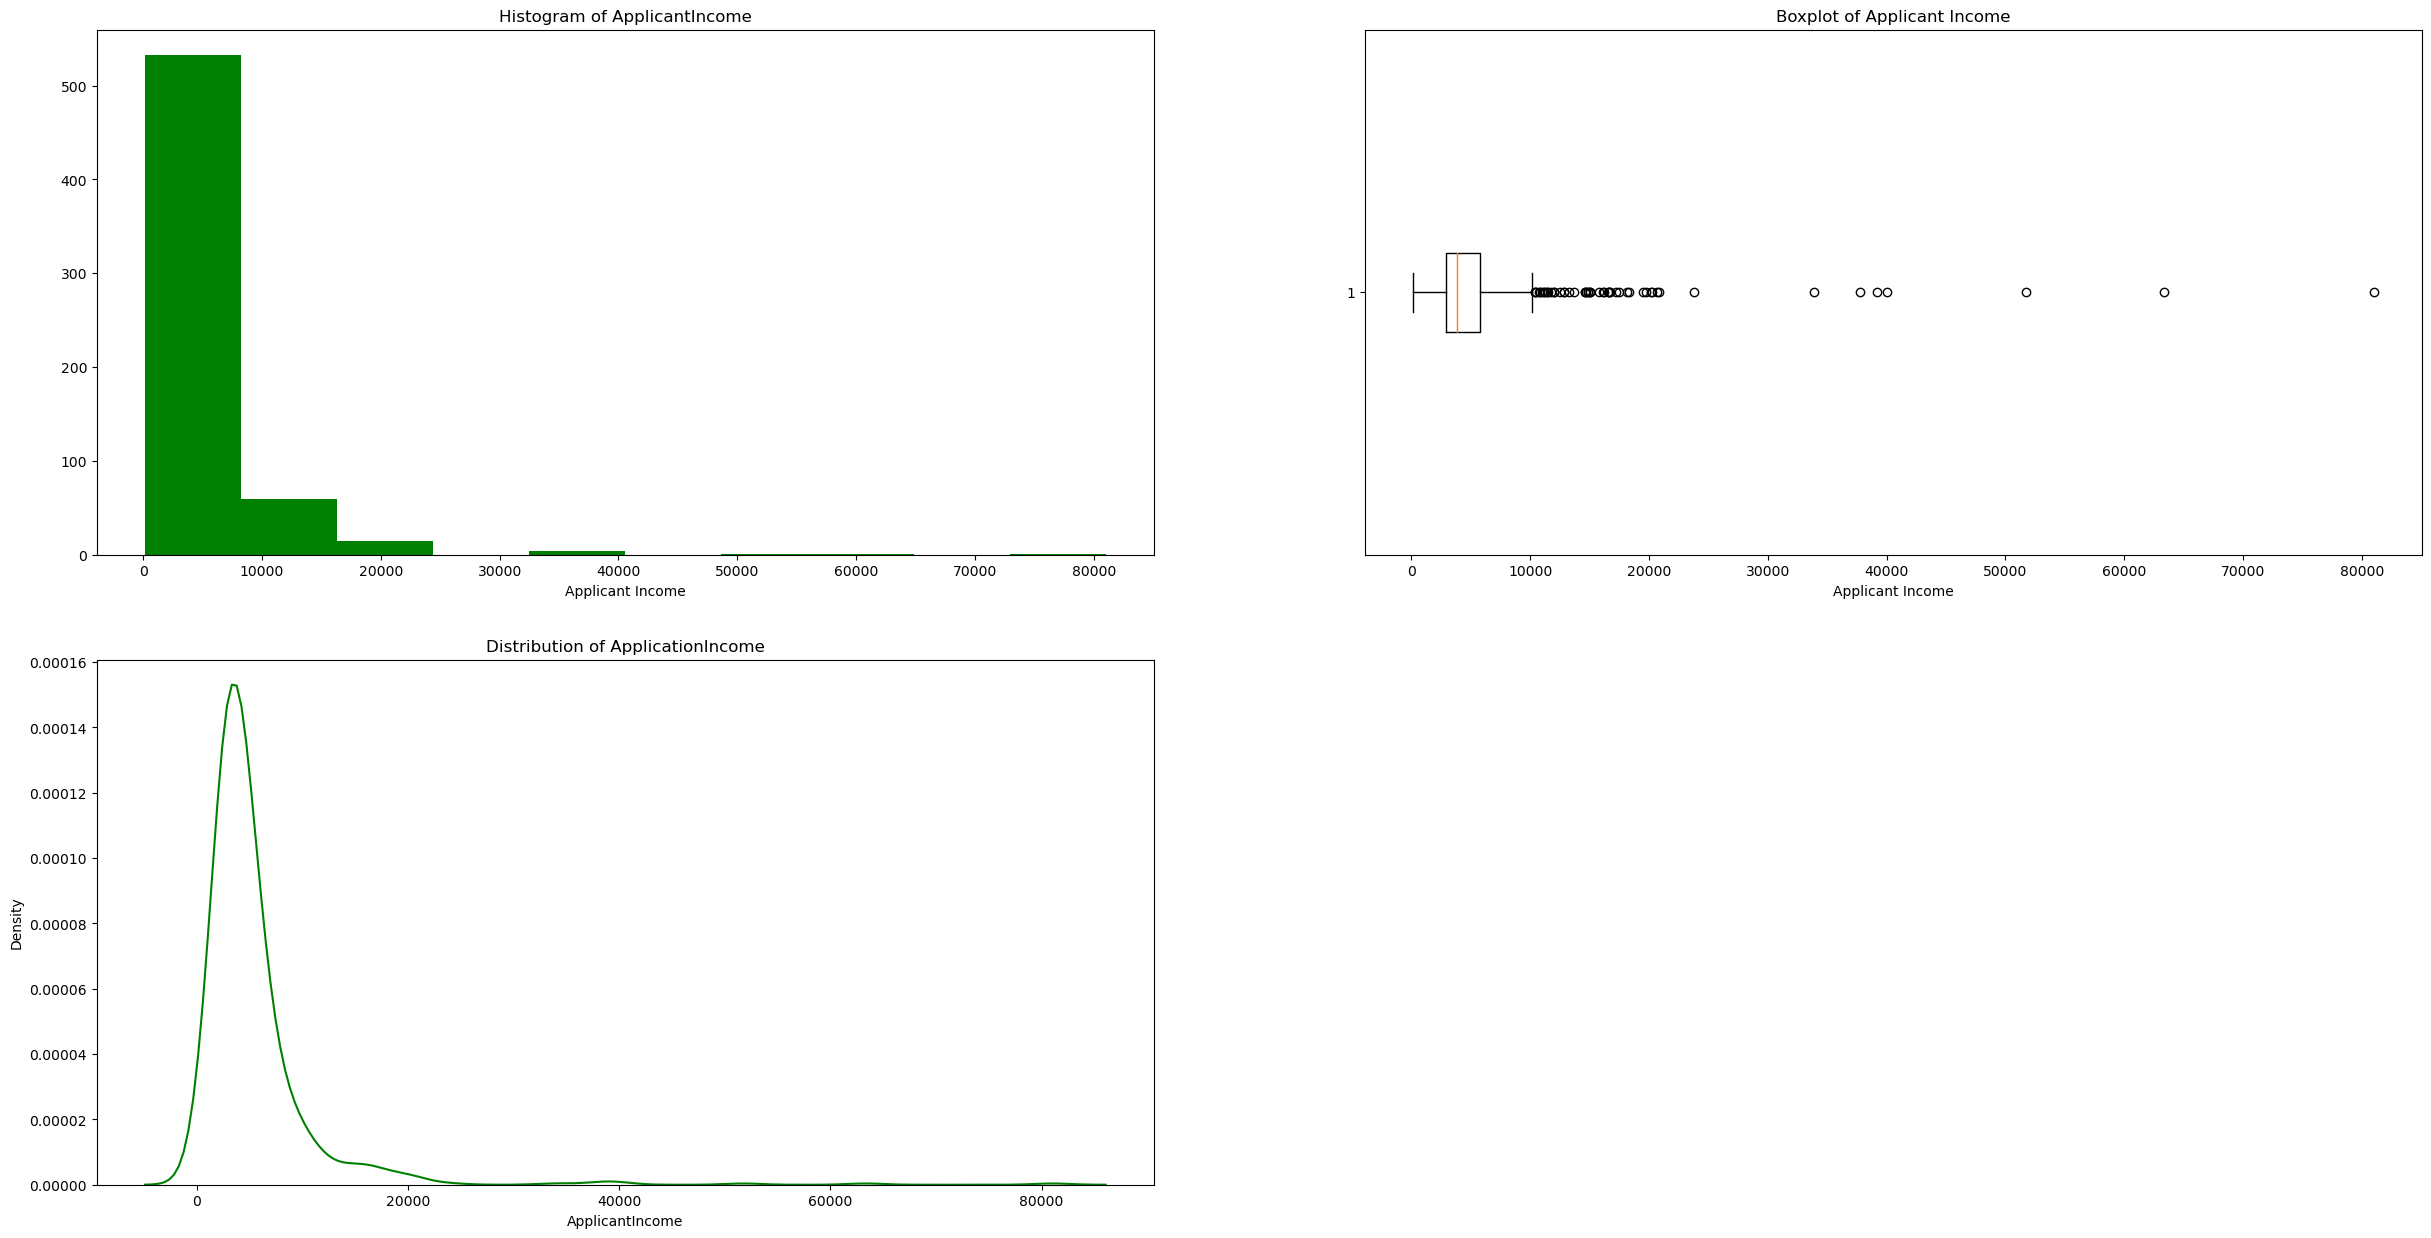

In [26]:
# Histogram Boxplot Density Curve

plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
plt.hist(train_df.ApplicantIncome, color='green')
plt.title("Histogram of ApplicantIncome")
plt.xlabel("Applicant Income")

plt.subplot(2,2,2)
plt.boxplot(train_df.ApplicantIncome, vert=False)
plt.title("Boxplot of Applicant Income")
plt.xlabel("Applicant Income")

plt.subplot(2,2,3)
sns.kdeplot(train_df.ApplicantIncome, color='green')
plt.title("Distribution of ApplicationIncome")
plt.xlabel("ApplicantIncome")

print("SKEWNESS :",train_df.ApplicantIncome.skew())
print("KURTOSIS :",train_df.ApplicantIncome.kurt())

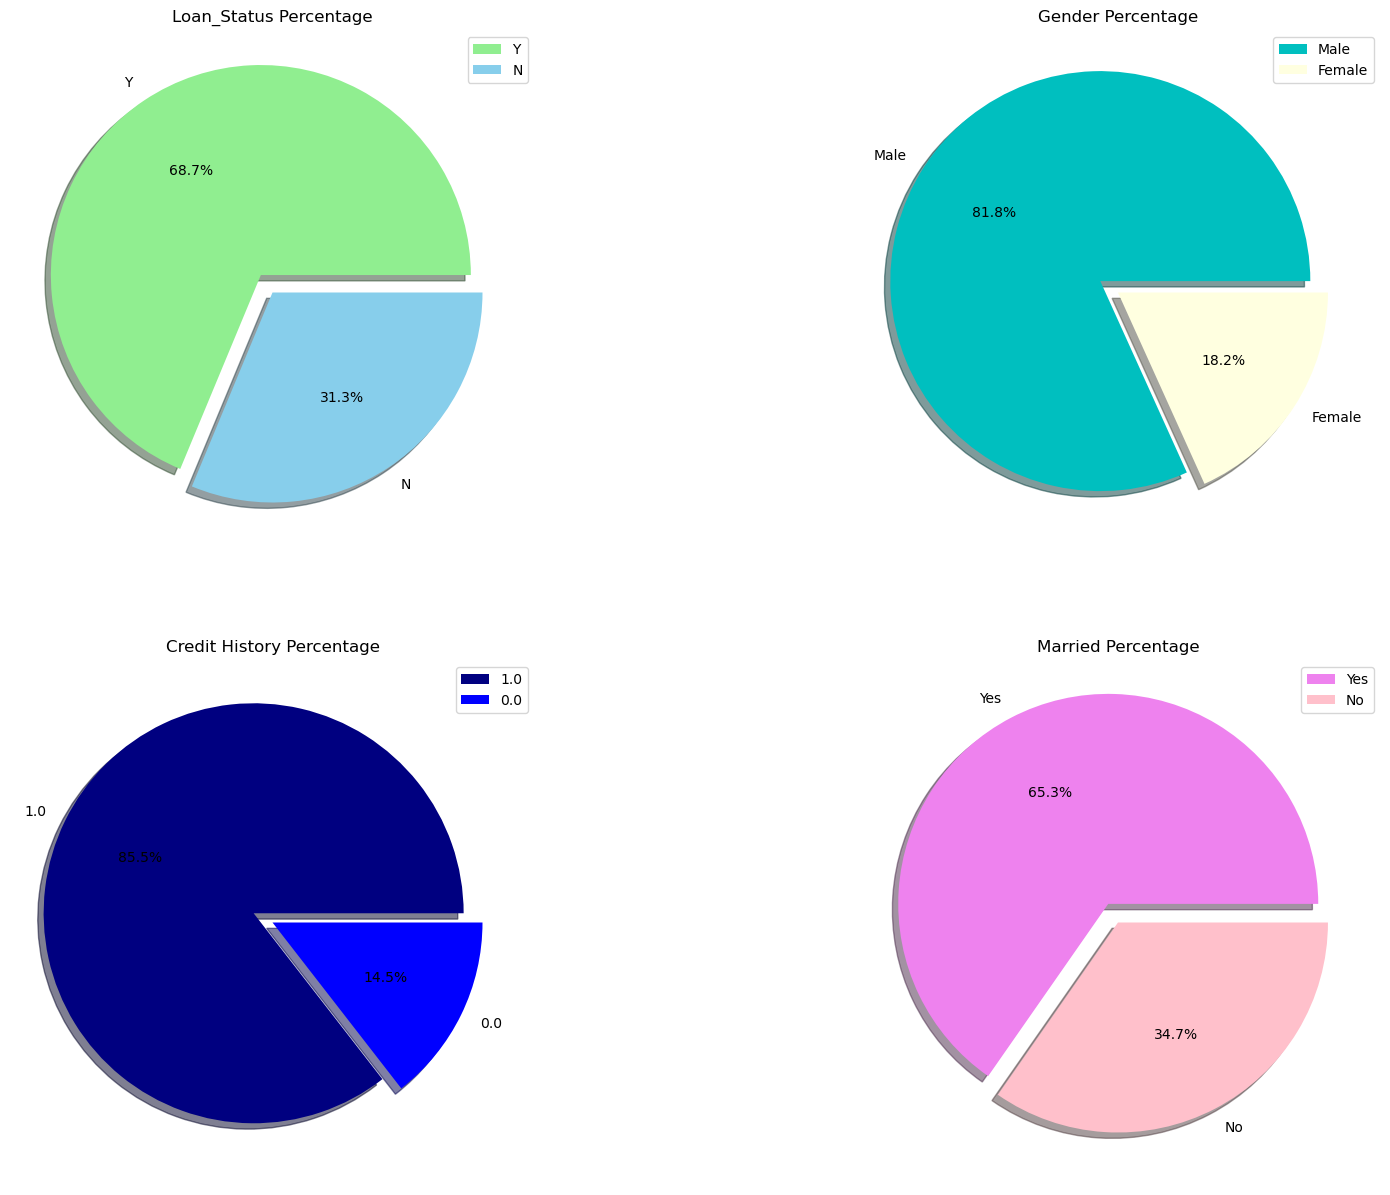

In [27]:
# Univariate Analysis

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.pie(train_df.Loan_Status.value_counts(), autopct='%.1f%%',
       labels=train_df.Loan_Status.value_counts().index,
       colors=['lightgreen', 'skyblue'], explode=[0.1,0], shadow=True)
plt.title("Loan_Status Percentage")
plt.legend(loc= "upper right")

plt.subplot(2,2,2)
plt.pie(train_df.Gender.value_counts(), autopct='%.1f%%',
       labels=train_df.Gender.value_counts().index,
       colors=['c', 'lightyellow'], explode=[0.1,0], shadow=True)
plt.title("Gender Percentage")
plt.legend(loc= "upper right")


plt.subplot(2,2,3)
plt.pie(train_df.Credit_History.value_counts(), autopct='%.1f%%',
       labels=train_df.Credit_History.value_counts().index,
       colors=['navy', 'blue'], explode=[0.1,0], shadow=True)
plt.title("Credit History Percentage")
plt.legend(loc= "upper right")

plt.subplot(2,2,4)
plt.pie(train_df.Married.value_counts(), autopct='%.1f%%',
       labels=train_df.Married.value_counts().index,
       colors=['violet', 'pink'], explode=[0.1,0], shadow=True)
plt.title("Married Percentage")
plt.legend(loc= "upper right")

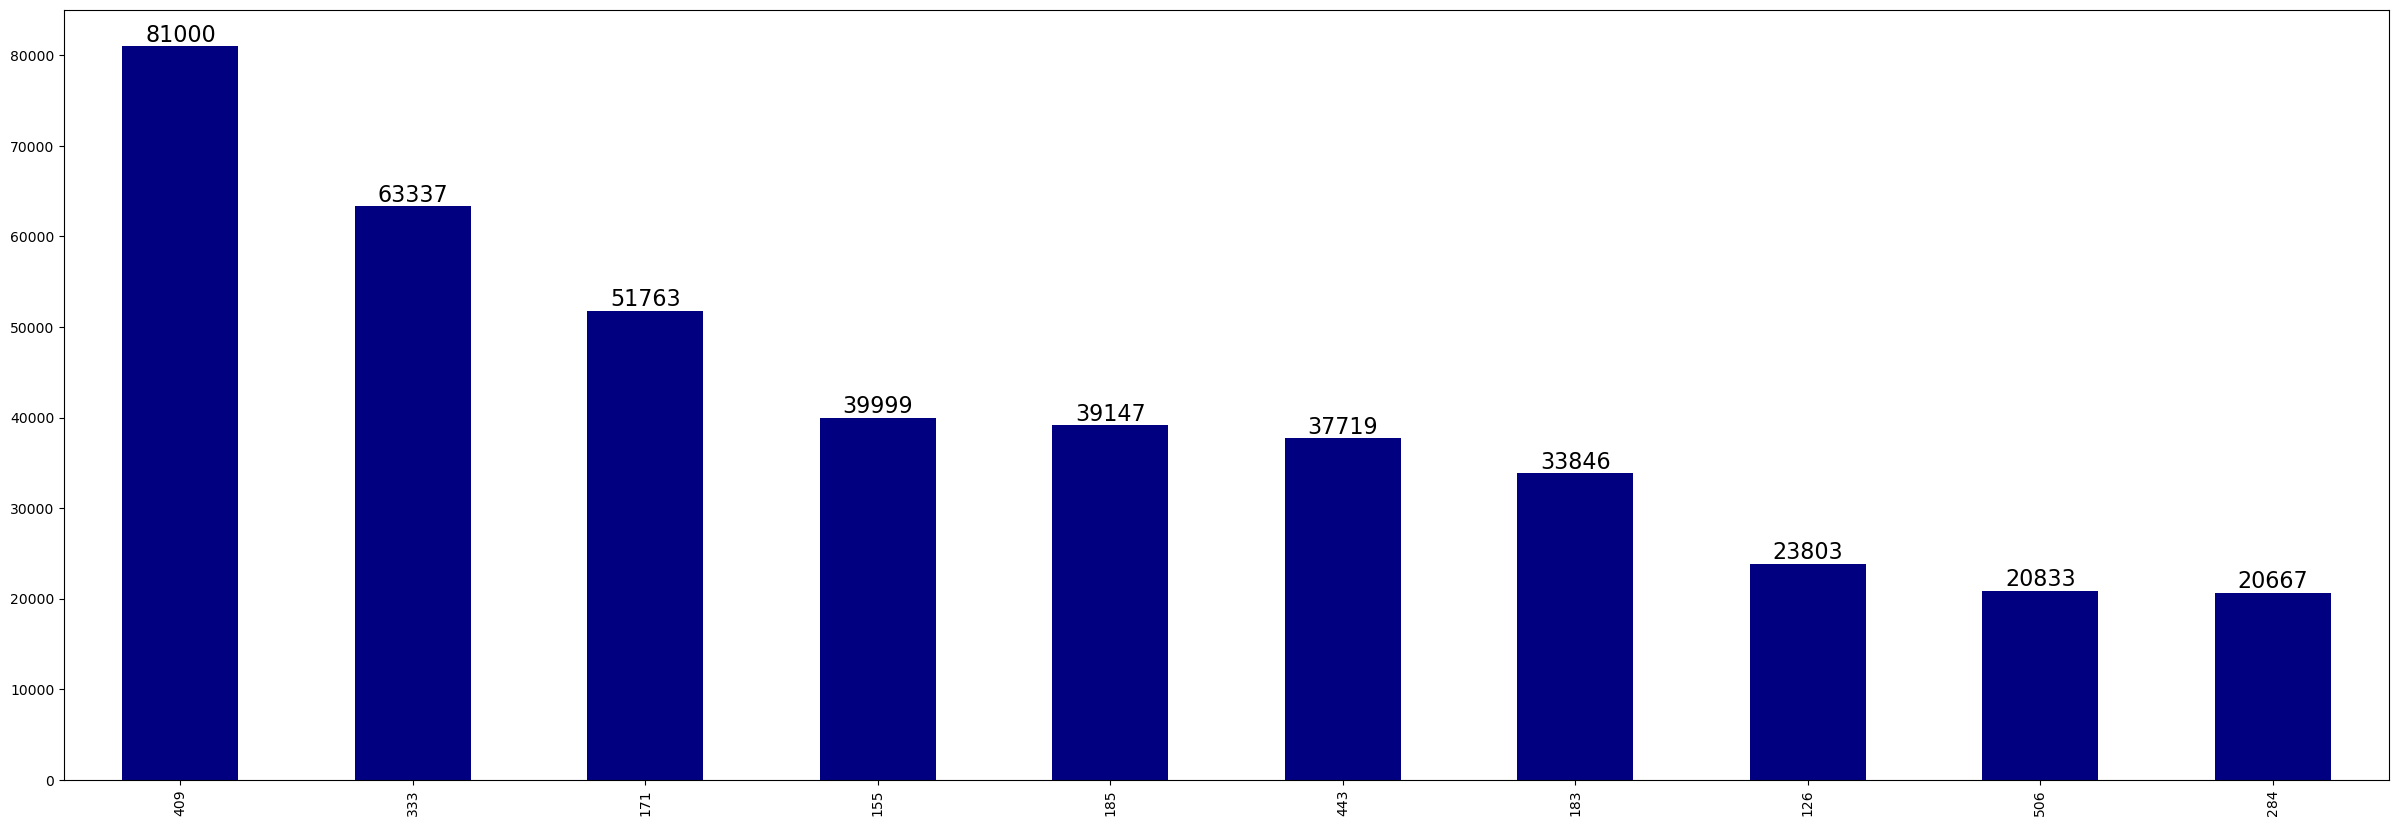

In [28]:
# Highest Applicant Income

plt.figure(figsize=(30,10))
ax = train_df.ApplicantIncome.nlargest(10).sort_values(
    ascending=False).plot(kind='bar', color='navy')

for i in ax.containers:
    ax.bar_label(i, fontsize=16)

##### Data Transformation

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [30]:
# split data into numeric and object cols 

combined_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
objcols = combined_df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
                       'Credit_History', 'Property_Area']]

numcols = combined_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Loan_Status']]

In [32]:
# Dummy Encode 

objcols_dummy = pd.get_dummies(objcols, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
                       'Credit_History', 'Property_Area'])

In [33]:
objcols_dummy.shape

(981, 17)

In [34]:
objcols_dummy['Loan_Status']=numcols.Loan_Status

In [35]:
objcols_dummy.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,Y
1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,N
2,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,Y
3,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,Y
4,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,Y


In [36]:
numcols=numcols.drop('Loan_Status',axis=1)

In [37]:
# Scaling the data

numcols_scaled = StandardScaler().fit_transform(numcols)

In [38]:
# Convert back to dataframe

numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [39]:
numcols_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.117565,-0.589506,-0.210291,0.270528
1,-0.104844,-0.034561,-0.184098,0.270528
2,-0.382944,-0.589506,-0.996077,0.270528
3,-0.456202,0.278239,-0.288869,0.270528
4,0.144093,-0.589506,-0.013844,0.270528


In [40]:
numcols_scaled= numcols_scaled.reset_index()

In [41]:
objcols_dummy=objcols_dummy.reset_index()

In [42]:
# concat all the Dataframes into one

clean_df = pd.concat([numcols_scaled,objcols_dummy],axis=1)

In [43]:
# Split back to trian and test

final_train = clean_df[clean_df.Loan_Status!='test']
final_test = clean_df[clean_df.Loan_Status=='test']

In [44]:
final_test=final_test.drop('Loan_Status',axis=1)

In [45]:
print(final_train.shape)
print(final_test.shape)

(614, 24)
(367, 23)


In [46]:
# Split data into X and y for Model Building

X=final_train.drop('Loan_Status',axis=1)
y=final_train.Loan_Status

In [47]:
y=LabelEncoder().fit_transform(y)

In [48]:
X.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,index,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.117565,-0.589506,-0.210291,0.270528,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,1,-0.104844,-0.034561,-0.184098,0.270528,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
2,2,-0.382944,-0.589506,-0.996077,0.270528,2,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
3,3,-0.456202,0.278239,-0.288869,0.270528,3,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1
4,4,0.144093,-0.589506,-0.013844,0.270528,4,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1


In [49]:
X=X.drop('index',axis=1)

### Sampling Methods

In [50]:
from imblearn.over_sampling import SMOTENC

In [51]:
smote= SMOTENC(categorical_features=list(range(4,21)))

In [52]:
X_smote, y_smote = smote.fit_resample(X,y)

In [53]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

1    422
0    192
dtype: int64
0    422
1    422
dtype: int64


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report

In [55]:
logit = LogisticRegression(max_iter=3000)

In [56]:
logitmodel = logit.fit(X,y)

In [57]:
logitmodel.score(X,y)

0.8127035830618893

In [58]:
logitpredict = logitmodel.predict(X)

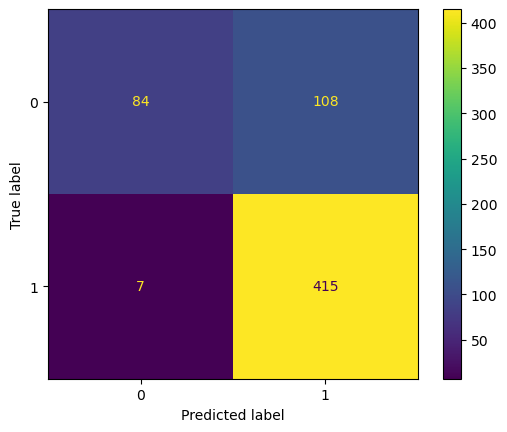

In [59]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

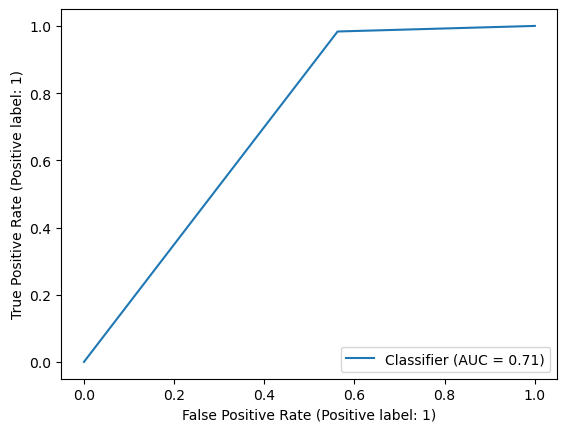

In [60]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [61]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



In [62]:
# Logistic Regression Using Smote

logit_smote =logit.fit(X_smote, y_smote)

In [63]:
logit_smote.score(X_smote,y_smote)

0.7582938388625592

In [64]:
smote_predict = logit_smote.predict(X_smote)

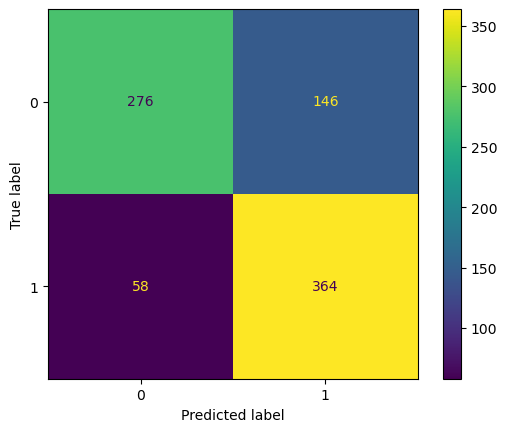

In [65]:
ConfusionMatrixDisplay.from_predictions(y_smote, smote_predict)

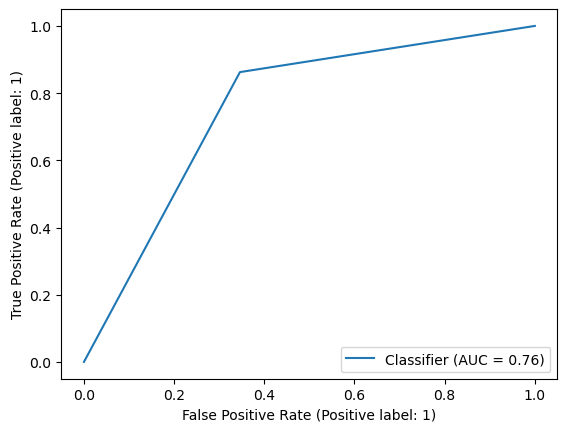

In [66]:
RocCurveDisplay.from_predictions(y_smote, smote_predict)

In [67]:
print(classification_report(y_smote, smote_predict))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       422
           1       0.71      0.86      0.78       422

    accuracy                           0.76       844
   macro avg       0.77      0.76      0.76       844
weighted avg       0.77      0.76      0.76       844



In [68]:
# Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

In [69]:
tree=DecisionTreeClassifier(max_depth=10, max_features=9)

In [70]:
treemodel = tree.fit(X_smote, y_smote)

In [71]:
treemodel.score(X_smote, y_smote)

0.9170616113744076

In [72]:
treepredict = treemodel.predict(X_smote)

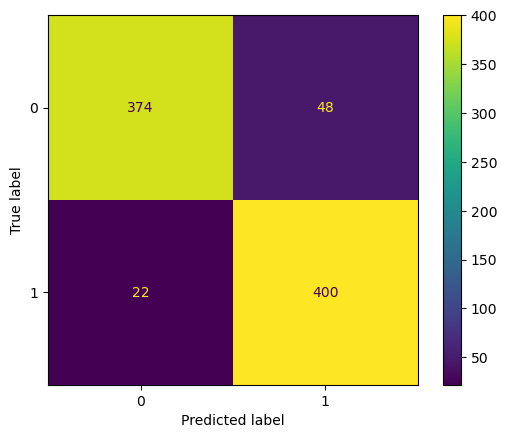

In [73]:
ConfusionMatrixDisplay.from_predictions(y_smote,treepredict)

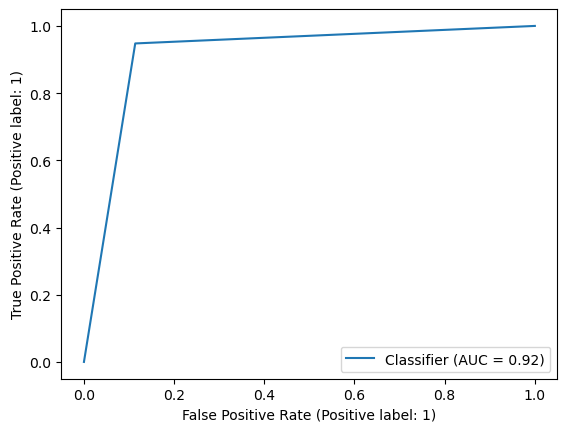

In [74]:
RocCurveDisplay.from_predictions(y_smote, treepredict)

In [75]:
print(classification_report(y_smote, treepredict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       422
           1       0.89      0.95      0.92       422

    accuracy                           0.92       844
   macro avg       0.92      0.92      0.92       844
weighted avg       0.92      0.92      0.92       844



### Ensemble Methods

    # RandomForest
    # Gradient Boosting

In [76]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [77]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10)

In [78]:
RFmodel =RF.fit(X_smote, y_smote)

In [79]:
RFmodel.score(X_smote, y_smote)

0.9703791469194313

In [80]:
RFpredict = RFmodel.predict(X_smote)

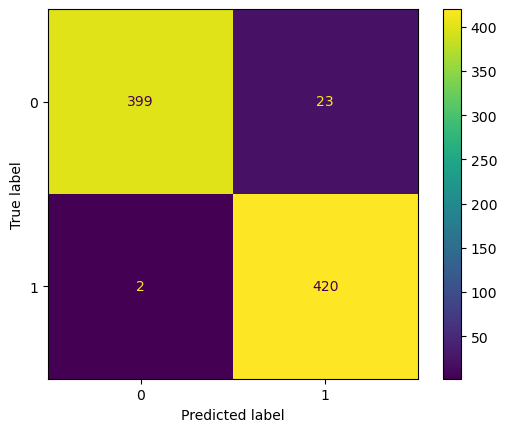

In [81]:
ConfusionMatrixDisplay.from_predictions(y_smote, RFpredict)

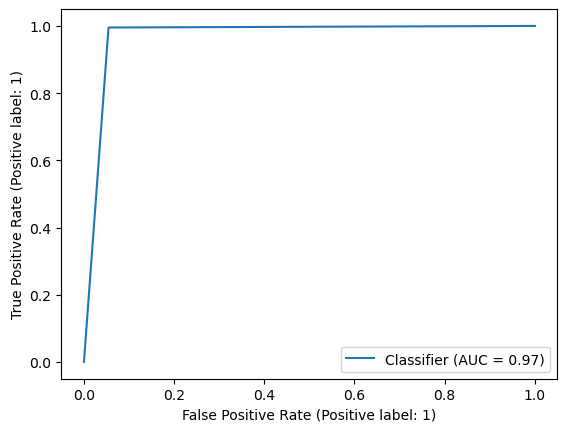

In [82]:
RocCurveDisplay.from_predictions(y_smote, RFpredict)

In [83]:
print(classification_report(y_smote, RFpredict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       422
           1       0.95      1.00      0.97       422

    accuracy                           0.97       844
   macro avg       0.97      0.97      0.97       844
weighted avg       0.97      0.97      0.97       844



In [84]:
gbm = GradientBoostingClassifier(n_estimators=1000, max_depth=6, learning_rate=0.003)

In [85]:
gbmmodel = gbm.fit(X_smote, y_smote)

In [86]:
gbmmodel.score(X_smote, y_smote)

0.9229857819905213

In [87]:
gbmpredit = gbmmodel.predict(X_smote)

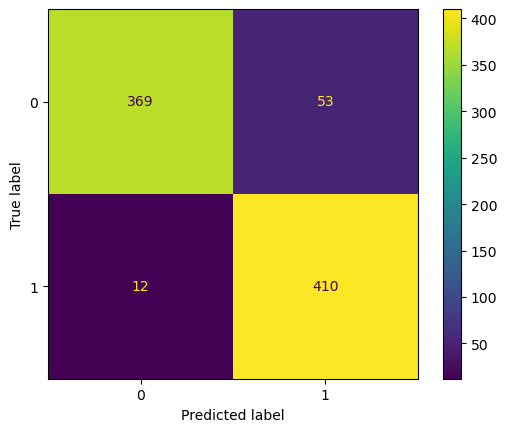

In [88]:
ConfusionMatrixDisplay.from_predictions(y_smote, gbmpredit)

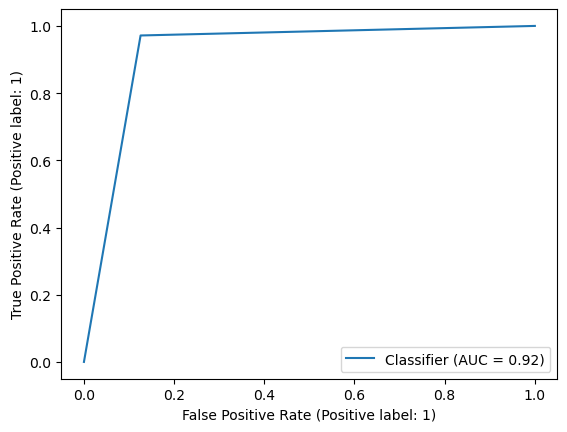

In [89]:
RocCurveDisplay.from_predictions(y_smote, gbmpredit)

In [90]:
print(classification_report(y_smote, gbmpredit))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       422
           1       0.89      0.97      0.93       422

    accuracy                           0.92       844
   macro avg       0.93      0.92      0.92       844
weighted avg       0.93      0.92      0.92       844



### XGBoost

In [91]:
from xgboost import XGBClassifier

In [92]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5)

In [93]:
xgbmodel = xgb.fit(X_smote, y_smote)

In [94]:
xgbmodel.score(X_smote, y_smote)

0.8317535545023697

In [95]:
xgbpredict = xgbmodel.predict(X_smote)

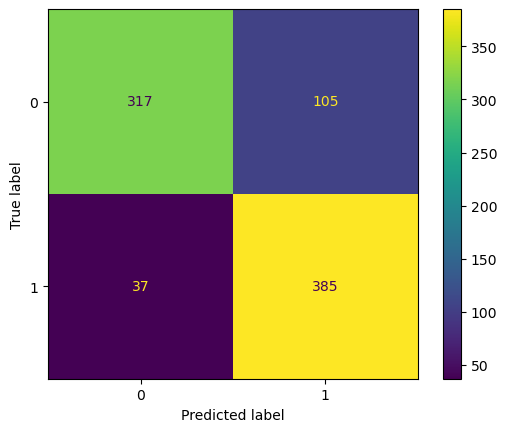

In [96]:
ConfusionMatrixDisplay.from_predictions(y_smote, xgbpredict)

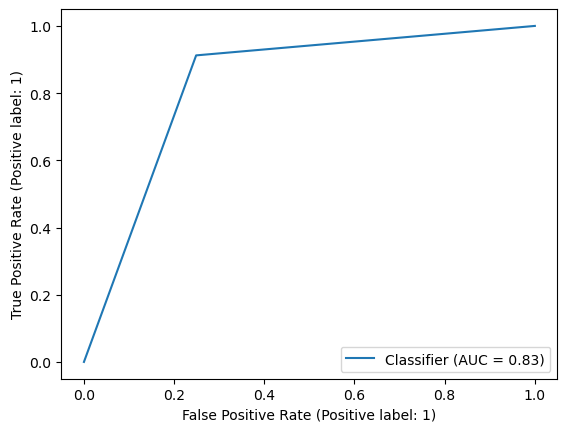

In [97]:
RocCurveDisplay.from_predictions(y_smote, xgbpredict)

In [98]:
print(classification_report(y_smote, xgbpredict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       422
           1       0.79      0.91      0.84       422

    accuracy                           0.83       844
   macro avg       0.84      0.83      0.83       844
weighted avg       0.84      0.83      0.83       844



In [99]:
cross_val_score(xgb,X,y)

array([0.81300813, 0.77235772, 0.7804878 , 0.82926829, 0.81967213])

In [100]:
np.mean([0.81300813, 0.77235772, 0.7804878 , 0.82926829, 0.81967213])

0.8029588139999999

In [101]:
# cat boost 

from catboost import CatBoostClassifier

In [102]:
cat=CatBoostClassifier(iterations=600, depth=8, learning_rate=0.001)

In [103]:
catmodel=cat.fit(X_smote, y_smote)

0:	learn: 0.6925672	total: 151ms	remaining: 1m 30s
1:	learn: 0.6920564	total: 155ms	remaining: 46.3s
2:	learn: 0.6916560	total: 156ms	remaining: 31s
3:	learn: 0.6910856	total: 159ms	remaining: 23.7s
4:	learn: 0.6905255	total: 163ms	remaining: 19.3s
5:	learn: 0.6899605	total: 165ms	remaining: 16.4s
6:	learn: 0.6893705	total: 168ms	remaining: 14.3s
7:	learn: 0.6888730	total: 171ms	remaining: 12.7s
8:	learn: 0.6884043	total: 174ms	remaining: 11.4s
9:	learn: 0.6878448	total: 177ms	remaining: 10.4s
10:	learn: 0.6873348	total: 178ms	remaining: 9.55s
11:	learn: 0.6868545	total: 179ms	remaining: 8.79s
12:	learn: 0.6863364	total: 182ms	remaining: 8.22s
13:	learn: 0.6857783	total: 185ms	remaining: 7.74s
14:	learn: 0.6853150	total: 188ms	remaining: 7.32s
15:	learn: 0.6848056	total: 191ms	remaining: 6.95s
16:	learn: 0.6842820	total: 194ms	remaining: 6.64s
17:	learn: 0.6838169	total: 195ms	remaining: 6.29s
18:	learn: 0.6833979	total: 198ms	remaining: 6.04s
19:	learn: 0.6828550	total: 200ms	remainin

In [104]:
catmodel.score(X_smote,y_smote)

0.8234597156398105

In [105]:
catpredict=catmodel.predict(X_smote)

In [106]:
print(classification_report(y_smote, catpredict))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       422
           1       0.76      0.94      0.84       422

    accuracy                           0.82       844
   macro avg       0.84      0.82      0.82       844
weighted avg       0.84      0.82      0.82       844



In [107]:
cross_val_score(cat, X,y)

0:	learn: 0.6925713	total: 3.01ms	remaining: 1.8s
1:	learn: 0.6920168	total: 5.71ms	remaining: 1.71s
2:	learn: 0.6915336	total: 6.43ms	remaining: 1.28s
3:	learn: 0.6910108	total: 8.03ms	remaining: 1.2s
4:	learn: 0.6905138	total: 9.65ms	remaining: 1.15s
5:	learn: 0.6900334	total: 10.4ms	remaining: 1.03s
6:	learn: 0.6895629	total: 11.2ms	remaining: 949ms
7:	learn: 0.6890571	total: 12.9ms	remaining: 952ms
8:	learn: 0.6885391	total: 15.2ms	remaining: 1s
9:	learn: 0.6879399	total: 17.5ms	remaining: 1.03s
10:	learn: 0.6874700	total: 18.3ms	remaining: 982ms
11:	learn: 0.6869712	total: 19.3ms	remaining: 946ms
12:	learn: 0.6864407	total: 21.8ms	remaining: 983ms
13:	learn: 0.6859503	total: 22.6ms	remaining: 945ms
14:	learn: 0.6854384	total: 24.2ms	remaining: 944ms
15:	learn: 0.6849077	total: 25.8ms	remaining: 942ms
16:	learn: 0.6843038	total: 28.3ms	remaining: 969ms
17:	learn: 0.6838228	total: 29.2ms	remaining: 944ms
18:	learn: 0.6832483	total: 31.6ms	remaining: 967ms
19:	learn: 0.6826742	total:

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [108]:
np.mean([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

0.8094628800000001